In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
sns.set(color_codes=True)
#sns.set(rc={'figure.figsize':(12,6.5)})
from scipy import stats

In [2]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv('data/btc_final.csv', chunksize=50000)

In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # (optional) --> perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df = pd.concat(chunk_list)

## EDA

### Trends

In [4]:
btc_trends_df = pd.read_csv('data/BTC_trend.csv')

In [5]:
btc_trends_df['date'] = pd.to_datetime(btc_trends_df['date'])

In [6]:
btc_trends_df.columns

Index(['date', 'Bitcoin', 'BTC', 'isPartial'], dtype='object')

In [7]:
btc_trends_monthly_df = btc_trends_df.groupby(btc_trends_df.date.dt.date).mean().reset_index()
btc_trends_monthly_df.head()

,date,Bitcoin,BTC,isPartial
0,2020-01-01,31.291667,8.666667,False
1,2020-01-02,51.416667,15.166667,False
2,2020-01-03,56.416667,16.875000,False
3,2020-01-04,51.375000,15.833333,False
4,2020-01-05,52.291667,15.541667,False


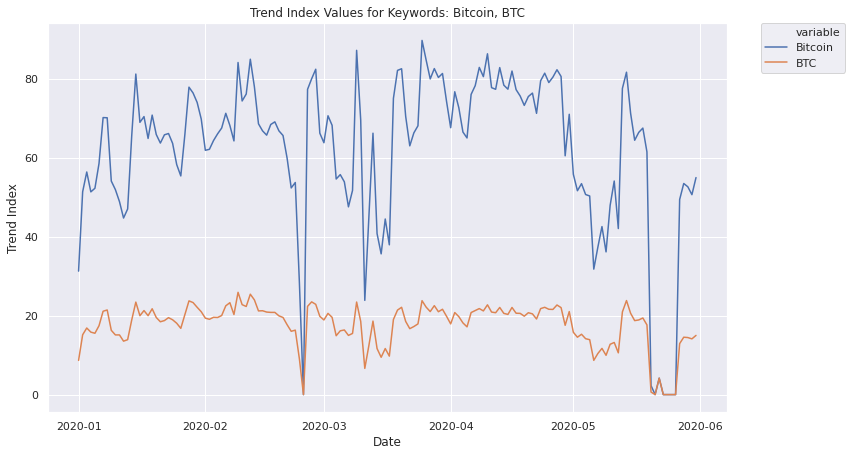

In [8]:
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(btc_trends_monthly_df, id_vars=['date'], value_vars=['Bitcoin', 'BTC']))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set(xlabel='Date', ylabel='Trend Index')
ax.set_title('Trend Index Values for Keywords: Bitcoin, BTC') 
ax
plt.savefig('plots/bitcoin_trends_daily.png', transparent=True)

In [9]:
trump_trends_df = pd.read_csv('data/Trump_Trend_merged.csv')
trump_trends_df['date'] = pd.to_datetime(trump_trends_df['date'])
trump_trends_df.head()

,date,Trump,isPartial
0,2020-01-01 00:00:00,20,False
1,2020-01-01 01:00:00,20,False
2,2020-01-01 02:00:00,0,False
3,2020-01-01 03:00:00,0,False
4,2020-01-01 04:00:00,0,False


In [10]:
btc_trends_df.tail()

,date,Bitcoin,BTC,isPartial
3641,2020-05-30 20:00:00,52,13,False
3642,2020-05-30 21:00:00,59,13,False
3643,2020-05-30 22:00:00,57,15,False
3644,2020-05-30 23:00:00,60,16,False
3645,2020-05-31 00:00:00,55,15,False


In [11]:
trump_trends_df2 = pd.read_csv('data/Trump_trend_2.csv')
trump_trends_df2.tail()

,date,Trump,isPartial
92,2020-05-30 20:00:00,18,False
93,2020-05-30 21:00:00,21,False
94,2020-05-30 22:00:00,21,False
95,2020-05-30 23:00:00,21,False
96,2020-05-31 00:00:00,21,False


In [12]:
pd.concat([trump_trends_df, trump_trends_df2]).to_csv('data/Trump_Trend_merged.csv', index=False)

In [13]:
trends_df = pd.merge(trump_trends_df, btc_trends_df, on='date', suffixes=('_Trump', '_Bitcoin'))
trends_df = trends_df.groupby(trends_df.date.dt.date).mean().reset_index()
trends_df.head()

,date,Trump,isPartial_Trump,Bitcoin,BTC,isPartial_Bitcoin
0,2020-01-01,10.416667,False,31.291667,8.666667,False
1,2020-01-02,14.333333,False,51.416667,15.166667,False
2,2020-01-03,47.583333,False,56.416667,16.875000,False
3,2020-01-04,41.375000,False,51.375000,15.833333,False
4,2020-01-05,38.416667,False,52.291667,15.541667,False


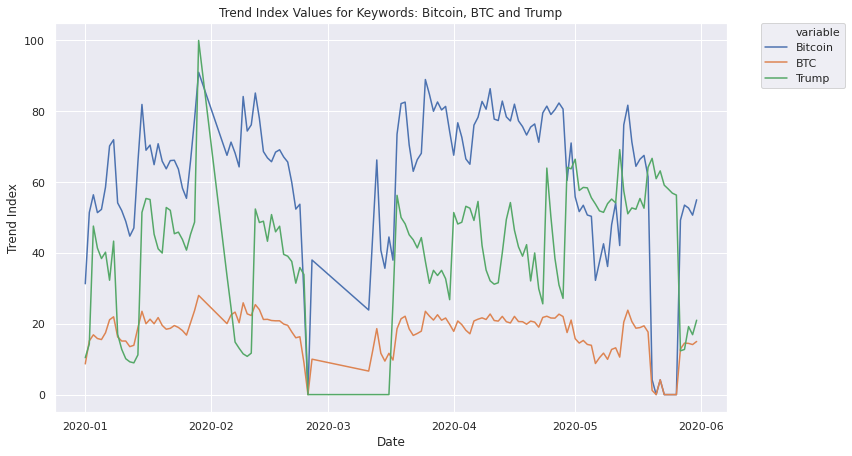

In [14]:
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(trends_df, id_vars=['date'], value_vars=['Bitcoin', 'BTC', 'Trump']))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set(xlabel='Date', ylabel='Trend Index')
ax.set_title('Trend Index Values for Keywords: Bitcoin, BTC and Trump') 
ax
plt.savefig('plots/trends_daily.png', transparent=True)

### Consolidated data frame

In [15]:
df.shape

(585320, 32)

In [16]:
df.columns.values

array(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url', 'neg', 'neu', 'pos', 'compound', 'date', 'Bitcoin',
       'BTC', 'isPartial', 'date_vcrix', 'vcrix', 'vcrix_log_diff'],
      dtype=object)

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.describe()

,likes,parent_tweet_id,replies,retweets,tweet_id,user_id,video_url,neg,neu,pos,compound,Bitcoin,BTC,vcrix,vcrix_log_diff
count,585320.000000,5.141900e+04,585320.000000,585320.000000,5.853200e+05,5.853200e+05,0.0,49789.000000,49789.000000,49789.000000,49789.000000,585320.000000,585320.000000,585320.000000,582056.000000
mean,3.787362,1.239236e+18,0.772314,1.241072,1.239701e+18,6.883722e+17,NaN,0.030796,0.890572,0.078452,0.117643,62.998430,17.607493,1016.853687,0.003417
std,40.436490,2.842416e+16,18.785230,24.106375,1.592141e+16,4.992156e+17,NaN,0.078992,0.145974,0.120579,0.340139,21.642797,6.279846,572.256770,0.118865
min,0.000000,1.110303e+09,0.000000,0.000000,1.212162e+18,3.147000e+03,NaN,0.000000,0.000000,0.000000,-0.965700,0.000000,0.000000,509.948083,-0.764208
25%,0.000000,1.226167e+18,0.000000,0.000000,1.225889e+18,2.394249e+09,NaN,0.000000,0.803000,0.000000,0.000000,54.000000,15.000000,676.500591,-0.010394
50%,0.000000,1.240625e+18,0.000000,0.000000,1.239605e+18,9.441082e+17,NaN,0.000000,1.000000,0.000000,0.000000,66.000000,19.000000,760.157884,0.000000
75%,1.000000,1.255341e+18,0.000000,0.000000,1.253662e+18,1.087661e+18,NaN,0.000000,1.000000,0.141000,0.318200,77.000000,21.000000,919.535375,0.016466
max,10112.000000,1.266878e+18,7992.000000,8585.000000,1.266882e+18,1.266871e+18,NaN,0.750000,1.000000,1.000000,0.986400,100.000000,100.000000,2324.458014,1.089663


In [19]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

### Publishing bevavior

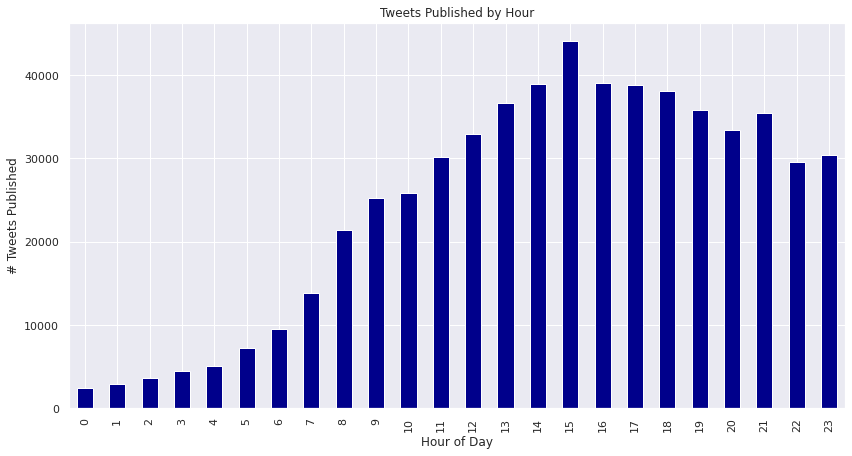

In [20]:
tweets_by_hour_plt = df['timestamp'].groupby(df["timestamp"].dt.hour).count().plot(kind="bar", title='Tweets Published by Hour', color='darkblue')
tweets_by_hour_plt.set_xlabel("Hour of Day")
tweets_by_hour_plt.set_ylabel("# Tweets Published")
plt.savefig('plots/dist_tweets_by_hour.png', transparent=True)

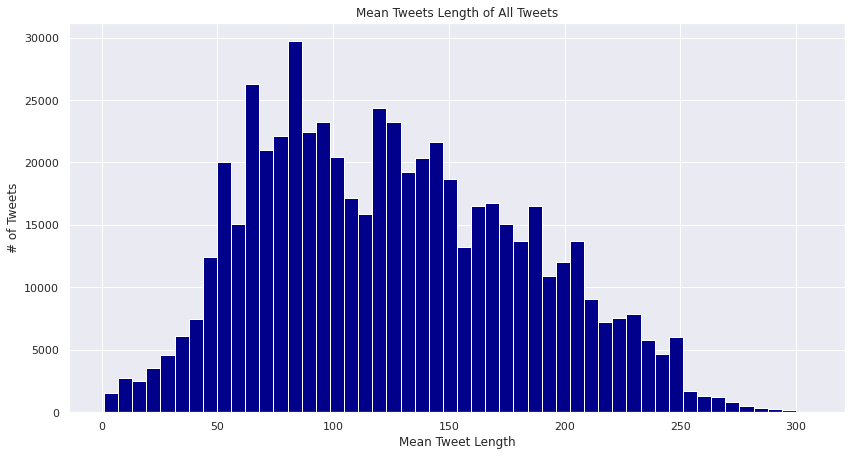

In [21]:
# Length of tweets 
ax = sns.distplot(df['text'].str.len(), kde=False, color='darkblue', hist_kws=dict(alpha=1))
ax.set(xlabel='Mean Tweet Length', ylabel='# of Tweets')
ax.set_title('Mean Tweets Length of All Tweets') 
ax
plt.savefig('plots/dist_tweets_length.png', transparent=True)

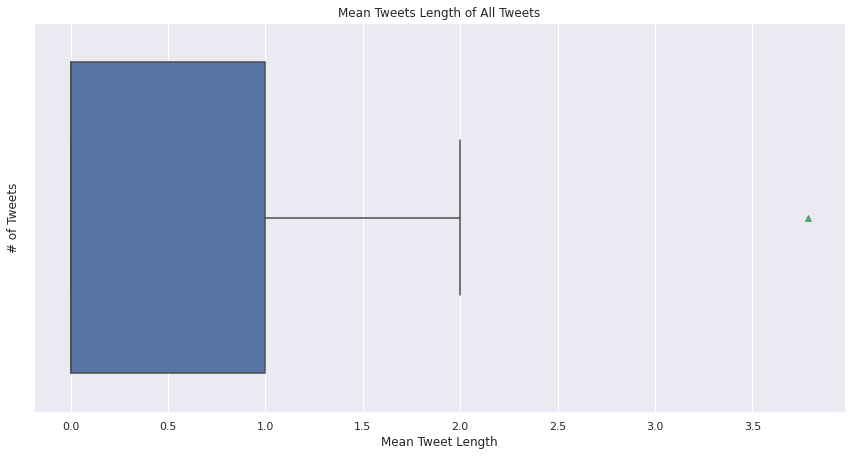

In [22]:
# Ratings dist 
ax = sns.boxplot(df['likes'], showfliers=False, showmeans=True)
ax.set(xlabel='Mean Tweet Length', ylabel='# of Tweets')
ax.set_title('Mean Tweets Length of All Tweets') 
ax
plt.savefig('plots/dist_tweets_length.png', transparent=True)

#### VCRIX

In [23]:
ts_vcrix = pd.read_csv("data/vcrix.csv", index_col='date')
ts_vcrix.shape

(152, 1)

In [24]:
ts_vcrix.reset_index()

,date,vcrix
0,2020-01-01,564.354535
1,2020-01-02,560.908175
2,2020-01-03,558.592397
3,2020-01-04,574.417128
4,2020-01-05,615.550024
...,...,...
147,2020-05-27,873.952874
148,2020-05-28,871.938590
149,2020-05-29,900.197688
150,2020-05-30,898.384012


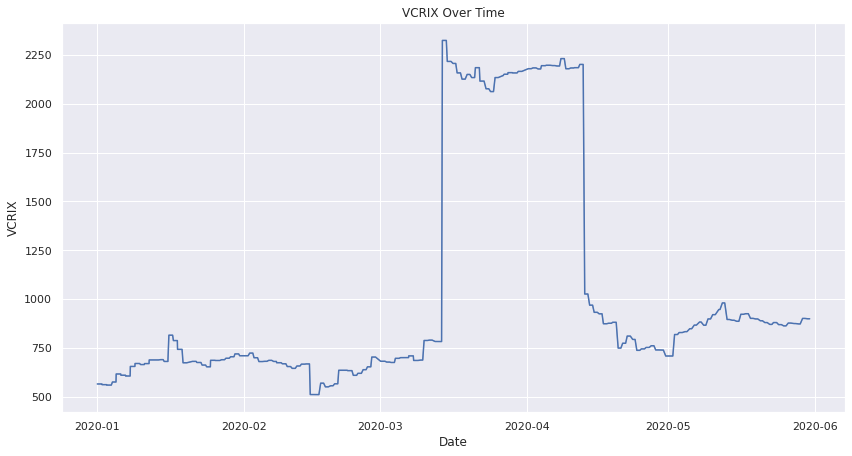

In [25]:
ax = sns.lineplot(x='date', y='vcrix', data=df)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set(xlabel='Date', ylabel='VCRIX')
ax.set_title('VCRIX Over Time') 
ax
plt.savefig('plots/vcrix.png', transparent=True)

In [26]:
ts_vcrix

,vcrix
date,
2020-01-01,564.354535
2020-01-02,560.908175
2020-01-03,558.592397
2020-01-04,574.417128
2020-01-05,615.550024
...,...
2020-05-27,873.952874
2020-05-28,871.938590
2020-05-29,900.197688


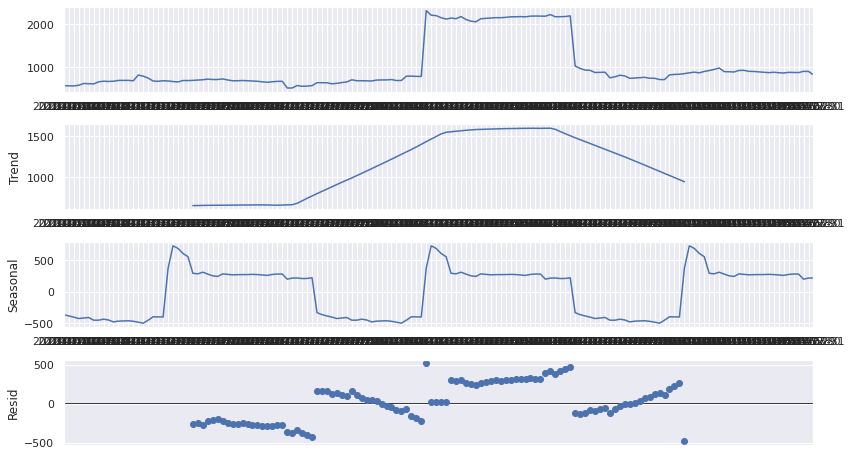

In [27]:
# decomposition
import statsmodels.api as sm
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

decomposition = sm.tsa.seasonal_decompose(ts_vcrix, model='additive', freq = 52)
fig = decomposition.plot()
"""
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(df['date'][0], 'Y')
datemax = np.datetime64(df['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
"""

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

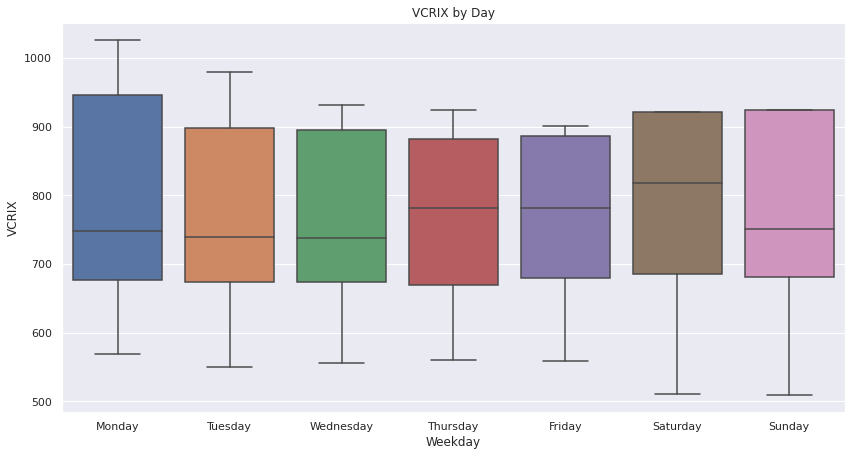

In [28]:
# Prepare data
df['day'] = [d.strftime('%A') for d in df.date]
#df['month'] = [d.strftime('%b') for d in df.date]
days = df['day'].unique()

# Draw Plot

# Ratings dist 
ax = sns.boxplot(x='day', y='vcrix', data=df, showfliers=False, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set(xlabel='Weekday', ylabel='VCRIX')
ax.set_title('VCRIX by Day') 
ax
plt.savefig('plots/vcrix_by_day.png', transparent=True)

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_vcrix['vcrix'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.793735
p-value: 0.383576
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577


In [30]:
ts_vcrix['log_diff'] = np.log(ts_vcrix['vcrix']) - np.log(ts_vcrix['vcrix'].shift(1))


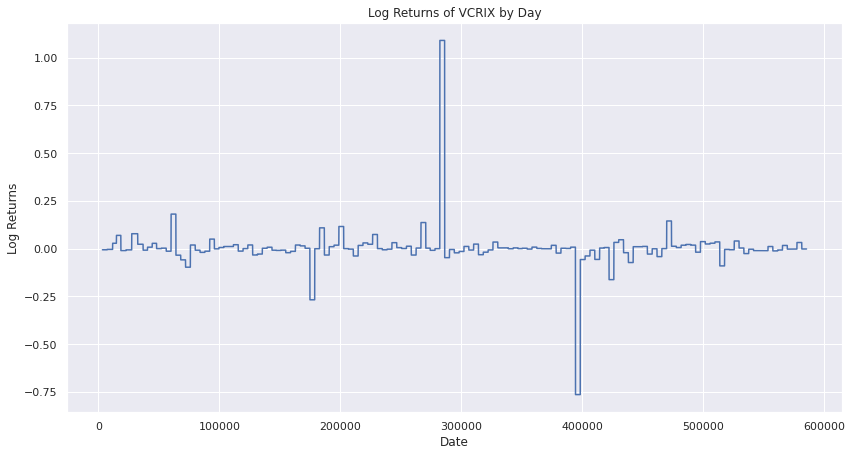

In [31]:
ax = sns.lineplot(data=df['vcrix_log_diff'])
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set(xlabel='Date', ylabel='Log Returns')
ax.set_title('Log Returns of VCRIX by Day') 
ax
plt.savefig('plots/vcrix_log_diff.png', transparent=True)

In [32]:
df.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url', 'neg', 'neu', 'pos', 'compound', 'date', 'Bitcoin', 'BTC',
       'isPartial', 'date_vcrix', 'vcrix', 'vcrix_log_diff', 'day'],
      dtype='object')

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_vcrix['log_diff'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.229139
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


In [34]:
ts_vcrix['log_diff'][1:]

date
2020-01-02   -0.006125
2020-01-03   -0.004137
2020-01-04    0.027936
2020-01-05    0.069160
2020-01-06   -0.010353
                ...   
2020-05-27   -0.002758
2020-05-28   -0.002307
2020-05-29    0.031895
2020-05-30   -0.002017
2020-05-31   -0.092291
Name: log_diff, Length: 151, dtype: float64

In [35]:
ts_vcrix.describe()

,vcrix,log_diff
count,152.000000,151.000000
mean,1024.582296,0.002468
std,580.307534,0.117455
min,509.948083,-0.764208
25%,678.499436,-0.010471
50%,766.581932,0.000000
75%,920.016948,0.013383
max,2324.458014,1.089663


In [36]:
# Normality test

In [37]:
# autocorrelation plots

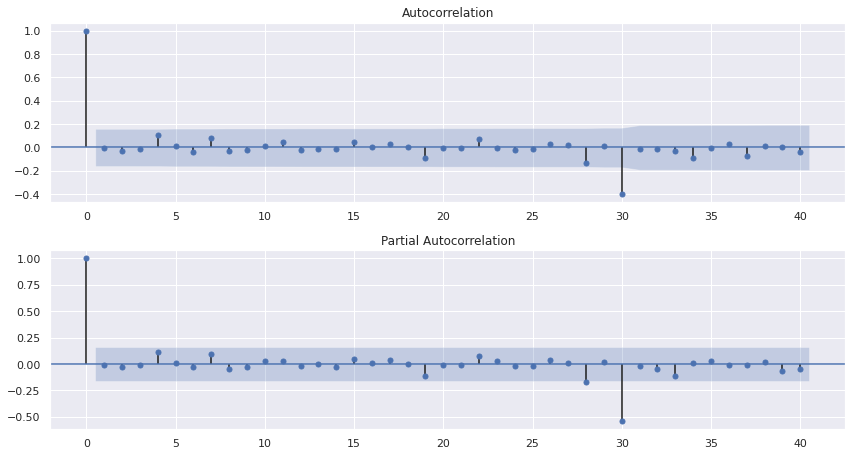

In [40]:
fig = plt.figure(figsize=(12,6.5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_vcrix['log_diff'][1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_vcrix['log_diff'][1:], lags=40, ax=ax2)
plt.savefig('plots/vcrix_acf_pacf.png', transparent=True)

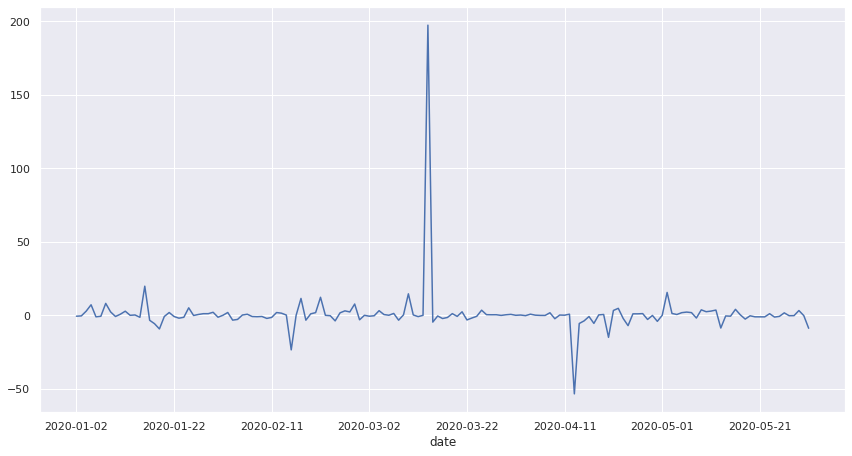

In [44]:
housing = ts_vcrix.vcrix.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing
housing
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

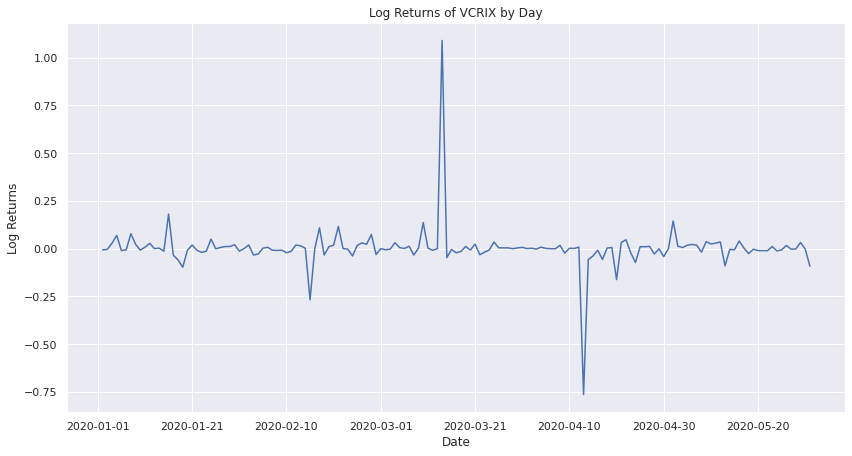

In [47]:
fig, ax = plt.subplots()
ax = ts_vcrix['log_diff'].plot(ax=ax)
ax.set(xlabel='Date', ylabel='Log Returns')
ax.set_title('Log Returns of VCRIX by Day') 
ax
plt.savefig('plots/vcrix_log_diff.png', transparent=True)

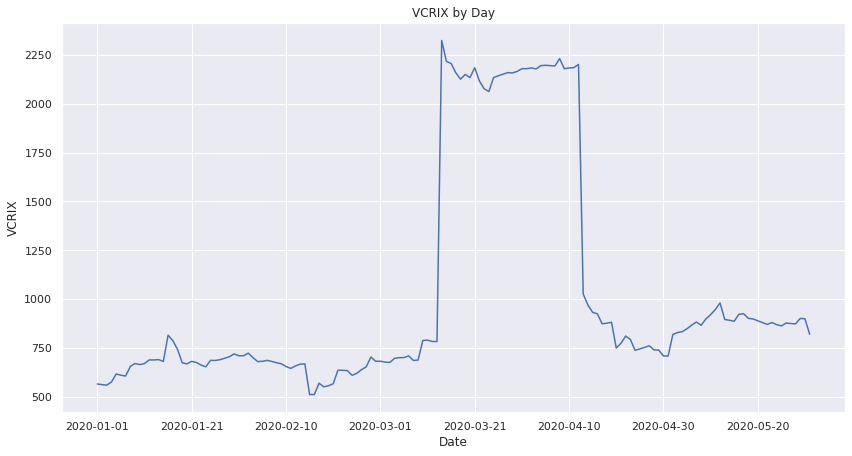

In [48]:
fig, ax = plt.subplots()
ax = ts_vcrix['vcrix'].plot(ax=ax)
ax.set(xlabel='Date', ylabel='VCRIX')
ax.set_title('VCRIX by Day') 
ax
plt.savefig('plots/vcrix.png', transparent=True)

#### Sentiments

In [2]:
sents = pd.read_csv("data/btc_tweets_sentiments.csv")

In [3]:
sents['text']

0         bitcoin jumps first due shorts liquidated cuz ...
1         bitcoin cryptocurrencies real money btc- 3ccby...
2         started two years ago stock market losses jing...
3         bitmex btc whale 4,973,247 worth bitcoin bough...
4         jan 3 2020 23:58:00 utc 7,326 usd €6,565 eur £...
                                ...                        
587952    controversial crypto surged 2 billion since fe...
587953    shinpuruna v1.5.7 update btc 6659 position lon...
587954    bitmex btc whale 2,509,088 worth bitcoin bough...
587955    historically speaking bitcoin performs pretty ...
587956    fatf says us ‘ largely compliant ’ virtual cur...
Name: text, Length: 587957, dtype: object

In [4]:
sents.head()



,Unnamed: 0,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,...,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,0.0,False,"['bitcoin', 'shorts', 'liquidated', 'Iran', 'W...",[],False,False,2,[],NaN,0,...,2020-01-03 23:59:55,1213248655320326144,/CryptoDivision/status/1213248655320326144,890003583231418368,TheCryptoDivision,NaN,0.147,0.853,0.000,-0.5095
1,1.0,False,"['bitcoin', 'BTC']",[],False,False,0,[],NaN,0,...,2020-01-03 23:59:47,1213248621438754816,/GetTheCrypto1/status/1213248621438754820,1105237963426816000,GetTheCrypto,NaN,0.000,1.000,0.000,0.0000
2,2.0,False,[],[],False,True,1,[],1.213121e+18,0,...,2020-01-03 23:59:23,1213248523585478656,/zhtttttty4/status/1213248523585478656,1186910416313737216,zhtttttty,NaN,0.088,0.749,0.163,0.3182
3,3.0,False,['Bitcoin'],[],False,False,4,[],NaN,0,...,2020-01-03 23:59:05,1213248448553730048,/WhaleTrades/status/1213248448553730048,968796006576947200,WhaleTrades 🐳,NaN,0.000,0.863,0.137,0.2263
4,4.0,False,"['Bitcoin', 'BTC']",[],False,False,0,[],NaN,0,...,2020-01-03 23:58:57,1213248411417370624,/reqBitcoinJS/status/1213248411417370624,1082323663238713344,Bitcoin.js //Bitcoin price every half hour,NaN,0.000,1.000,0.000,0.0000


In [5]:
sents['text'].fillna('', inplace=True)

In [6]:
# generate text
text = ' '.join(sents['text'])

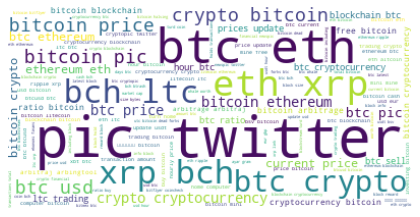

<Figure size 432x288 with 0 Axes>

In [9]:
from wordcloud import WordCloud, STOPWORDS

stop_words = ["btc", "bitcoin", "twitter"] + list(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('plots/tweets_wordcloud.png')